# Machine Learning POC
** Data ** : The record of Iris plant properties to classify them into three species

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as m
%matplotlib inline

### Step 1: Data Acquisition
Dataset downloaded from Kaggle

In [4]:
url="/home/ubuntu/Iris.csv"
names=['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Class']
source=pd.read_csv(url,names=names)

In [5]:
source.head(20)

,Sepal-length,Sepal-width,Petal-length,Petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
source.shape

(150, 5)

### Step 2: Data Cleaning

In [7]:
source.isnull().values.any()

False

** Matrix **
<br>
Blue -> Cyan -> Yellow -> Red -> DarkRed : Less to more correlated

              Sepal-length  Sepal-width  Petal-length  Petal-width
Sepal-length      1.000000    -0.109369      0.871754     0.817954
Sepal-width      -0.109369     1.000000     -0.420516    -0.356544
Petal-length      0.871754    -0.420516      1.000000     0.962757
Petal-width       0.817954    -0.356544      0.962757     1.000000


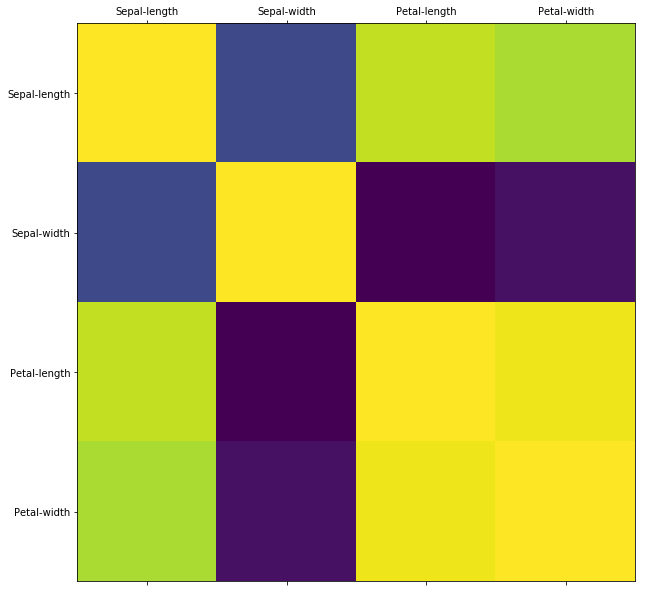

In [8]:
corr=source.corr()
print(corr)
plt.rcParams["figure.figsize"] = (10,10)
plt.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

### Step 3: Data Analysis

** Hold some data for validation **

In [9]:
a=source.values
X=a[:,0:4] #Features
Y=a[:,4] #Class
validation_size=0.20
seed=4
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring='accuracy'

** Train the models **
1. Logistic Regression
2. K Nearest Neighbours Classifier
3. Decision Tree Classifier

In [10]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,scoring=scoring,cv=kfold)
    names.append(name)
    results.append(cv_results)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
KNN: 0.975000 (0.038188)
DTC: 0.958333 (0.055902)


K Neighbors Classifier is chosen as the model.
### Step 4: Validation and Reporting

In [11]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions=knn.predict(X_validation)
print("Accuracy Score:")
print(m.accuracy_score(Y_validation,predictions))
print("Confusion Matrix:")
print(m.confusion_matrix(Y_validation,predictions))
print("Classification Report:")
print(m.classification_report(Y_validation,predictions))

Accuracy Score:
0.966666666667
Confusion Matrix:
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30



In [12]:
a=([[6,3,5,1]])
print(knn.predict(a))

['Iris-versicolor']


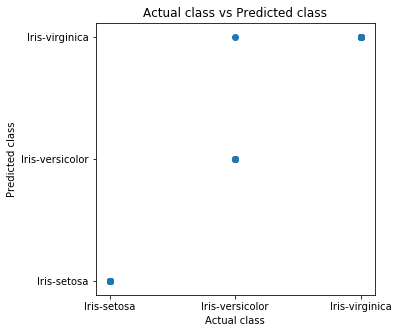

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(Y_validation,predictions)
plt.title("Actual class vs Predicted class")
plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.show()

In [14]:
sam=([[6.2,2.8,4.8,1.8]])
print(knn.predict(sam))

['Iris-virginica']
